In [1]:
import os
import sys

import re

import iso8601

import json

from urllib.request import urlretrieve, urlopen, Request

import requests

from datetime import datetime

from dateutil import tz

import pendulum

import numpy as np

import pandas as pd

from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

---

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---

In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero
------------------------------
 
------------------------------
           src_dir            
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero/src
------------------------------
 


---
## Data for use below

### **`df_baseball`**

In [4]:
df_baseball = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'baseball.csv'    
)

df_baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


### **`df_fifa`**

In [5]:
df_fifa = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'fifa.csv'    
)

df_fifa.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


### **`df_weather`**

In [6]:
df_weather = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'weather_data_austin_2010.csv',
    p_index_col    = 'Date',
    p_parse_dates  = True
)


df_weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


### **`df_departures`**

In [7]:
df_departures = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'austin_airport_departure_data_2015_july.csv',     
    p_index_col       = 'Date (MM/DD/YYYY)',    
    p_parse_dates     = True,
    p_skiprows        = list(range(0, 15))+[1757]    
)


df_departures.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103,N8607M,MDW,06:30,06:52,165,147,22,07:01,9,0,0,0,0,0,NaN
2015-07-01,WN,144,N8609A,SAN,20:55,20:50,170,158,-5,21:03,13,0,0,0,0,0,NaN
2015-07-01,WN,178,N646SW,ELP,20:30,20:45,90,80,15,20:55,10,0,0,0,0,0,NaN
2015-07-01,WN,232,N204WN,ATL,05:45,05:49,135,137,4,06:01,12,0,0,0,0,0,NaN
2015-07-01,WN,238,N233LV,DAL,12:30,12:34,55,48,4,12:41,7,0,0,0,0,0,NaN


---

### **`sample_dates_1`** and **`sample_dates_2`** 

In [8]:
sample_dates_1 = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'sample_dates_1.csv',     
    p_index_col       = 'Date',    
    p_parse_dates     = True    
)

sample_dates_2 = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'sample_dates_2.csv',     
    p_index_col       = 'Date',    
    p_parse_dates     = True    
)

In [9]:
sample_dates_1.tail()

,Seq
Date,
2016-07-13,12
2016-07-14,13
2016-07-15,14
2016-07-16,15
2016-07-17,16


In [10]:
sample_dates_2.tail()

,Seq
Date,
2016-07-11,6
2016-07-12,7
2016-07-13,8
2016-07-14,9
2016-07-15,10


### **`election`**

In [11]:
election = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'pennsylvania2012_turnout.csv',
    p_index_col    = 'county'
)

election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118



### **`titanic`**

In [12]:
titanic = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'titanic.csv'    
)

titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### **`pittsburgh_weather`**

In [13]:
pittsburgh_weather = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'pittsburgh_weather_data.csv'    
)

pittsburgh_weather.head(2)

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.0,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.0,4,NaN,272


### **`sales`**

In [14]:
sales = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'sales.csv',
    p_index_col    = 'month'
)

sales.head(2)

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31


### **`sales_feb`**

In [15]:
sales_feb = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'sales-feb-2015.csv',
    p_index_col    = 'Date',
    p_parse_dates  = True
)

sales_feb.head(3)

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13


### **`users`** 

In [16]:
users = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'users.csv'    
)

users.head(2)

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12


### **`gapminder`**

In [17]:
gapminder = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'gapminder_tidy.csv'    
)

gapminder.head(3)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia


### **`gapminder_2010`**

In [18]:
gapminder_2010 = gapminder[gapminder['Year'] == 2010]

del gapminder_2010['Year']

gapminder_2010.head(2)

,Country,fertility,life,population,child_mortality,gdp,region
46,Afghanistan,5.659,59.612,31411743.0,105.0,1637.0,South Asia
96,Albania,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia


### **`tips`**

In [19]:
tips = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'tips.csv'
)

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### **`tips_2`**

In [20]:
tips_2 = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'tips_2.csv'
)

tips_2.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01


### **`tweets`**

In [21]:
tweets = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'tweets.csv'
)

tweets.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [{'screen_na...","{'media': [{'sizes': {'large': {'w': 1024, 'h'...",0,False,low,NaN,714960401759387648,...,NaN,NaN,0,False,"{'retweeted': False, 'text': "".@krollbondratin...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @bpolitics: .@krollbondrating's Christopher...,1459294817758,False,"{'utc_offset': 3600, 'profile_image_url_https'..."
1,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [{'text': 'cruzsexscandal', 'indi...","{'media': [{'sizes': {'large': {'w': 500, 'h':...",0,False,low,NaN,714960401977319424,...,NaN,NaN,0,False,"{'retweeted': False, 'text': '@dmartosko Cruz ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @HeidiAlpine: @dmartosko Cruz video found.....,1459294817810,False,"{'utc_offset': None, 'profile_image_url_https'..."
2,NaN,NaN,Tue Mar 29 23:40:17 +0000 2016,"{'hashtags': [], 'user_mentions': [], 'symbols...",NaN,0,False,low,NaN,714960402426236928,...,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",Njihuni me ZonjÃ«n Trump !!! | Ekskluzive http...,1459294817917,False,"{'utc_offset': 7200, 'profile_image_url_https'..."


---

## Numpy

### Get **`df`** column into **`numpy array`**

In [22]:
df_baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


In [23]:
np_height = df_baseball['Height'].values
np_weight = df_baseball['Weight'].values

print(type(np_height))

<class 'numpy.ndarray'>


### math with `numpy arrays`

In [24]:
np_height_m  = np_height * 0.0254
np_weight_kg = np_weight * 0.453592

bmi = np_weight_kg / np_height_m ** 2

In [25]:
len(np_weight), len(np_height), len(np_height_m), len(np_weight_kg), len(bmi)

(1015, 1015, 1015, 1015, 1015)

### filter/slice `numpy arrays`

#### Example 1

In [26]:
light = bmi < 21

light

array([False, False, False, ..., False, False, False])

In [27]:
bmi[light]

array([20.54255679, 20.54255679, 20.69282047, 20.69282047, 20.34343189,
       20.34343189, 20.69282047, 20.15883472, 19.4984471 , 20.69282047,
       20.9205219 ])

#### Example 2

In [28]:
np_height[100:111]

array([73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72])

#### Example 3

In [29]:
np_positions = df_fifa[' position'].values
np_heights   = df_fifa[' height'].values

# -- -----------------------------------------------------

# Heights of the goalkeepers: 
gk_heights    = np_heights[np_positions == ' GK']

# Heights of the other players: 
other_heights = np_heights[np_positions != ' GK']

# -- -----------------------------------------------------

print("Median height of goalkeepers   : ", str(np.median(gk_heights)))

print("Median height of other players : ", str(np.median(other_heights)))

Median height of goalkeepers   :  188.0
Median height of other players :  181.0


---

---


### **`np.random`** 

In [30]:
# makes the random numbers predictable
np.random.seed(123)

for x in range(10):
    # retrun random int between 1 and 6
    print(
        np.random.randint(1, 7)
    )

6
3
5
3
2
4
3
4
2
2


In [31]:
# return random number between 0 and 1
np.random.rand()

0.6848297385848633

In [32]:
# return array with random values between 0 and 1
np.random.rand(3,2)

array([[0.4809319 , 0.39211752],
       [0.34317802, 0.72904971],
       [0.43857224, 0.0596779 ]])

In [33]:
# return array with random values between 0 and 1
# can have as many dimensions as you want
np.random.rand(3,2,2)

array([[[0.39804426, 0.73799541],
        [0.18249173, 0.17545176]],

       [[0.53155137, 0.53182759],
        [0.63440096, 0.84943179]],

       [[0.72445532, 0.61102351],
        [0.72244338, 0.32295891]]])

---

---


### **`np.transpose`**

```
In basic terms, np.transpose converts rows to columns.
    
    For example, from this:
    
        [[0 3 2 3 2 1 0]
         [0 1 2 3 4 5 4]
         [0 0 1 0 1 2 3]
         [0 1 2 3 4 5 9]
         [0 1 0 2 1 2 3]
         [0 0 1 2 4 5 6]]
    
    ... to this:
    
        [[0 0 0 0 0 0]
         [3 1 0 1 1 0]
         [2 2 1 2 0 1]
         [3 3 0 3 2 2]
         [2 4 1 4 1 4]
         [1 5 2 5 2 5]
         [0 4 3 9 3 6]]
```

In [34]:
# invent array with random numbers for demo
array = np.random.rand(4,2)

array

array([[0.36178866, 0.22826323],
       [0.29371405, 0.63097612],
       [0.09210494, 0.43370117],
       [0.43086276, 0.4936851 ]])

In [35]:
np.transpose(array)

array([[0.36178866, 0.29371405, 0.09210494, 0.43086276],
       [0.22826323, 0.63097612, 0.43370117, 0.4936851 ]])

---

---

### **`np.linespace`**

- `linspace` creates sequences of evenly spaced values within a defined interval.

In [36]:
np.linspace(
    start = 0, 
    stop  = 100, 
    num   = 5
)

array([  0.,  25.,  50.,  75., 100.])

---

In [37]:
np.linspace(
    start = 0, 
    stop  = 1, 
    num   = 11
)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

---
## Dataframes

---

### **`df.info()`**

In [38]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8847 non-null   int64  
 1    name         8847 non-null   object 
 2    rating       8847 non-null   int64  
 3    position     8847 non-null   object 
 4    height       8847 non-null   int64  
 5    foot         8847 non-null   object 
 6    rare         8847 non-null   int64  
 7    pace         8847 non-null   object 
 8    shooting     8847 non-null   object 
 9    passing      8847 non-null   object 
 10   dribbling    8847 non-null   object 
 11   defending    8847 non-null   object 
 12   heading      8847 non-null   object 
 13   diving       8847 non-null   object 
 14   handling     8847 non-null   object 
 15   kicking      8847 non-null   object 
 16   reflexes     8847 non-null   object 
 17   speed        8847 non-null   object 
 18   positioning  930 non-null  

---

### **`df.describe()`**

In [39]:
df_fifa.describe()

,id,rating,height,rare,positioning
count,8847.000000,8847.000000,8847.000000,8847.000000,930.000000
mean,152337.538035,66.680457,181.750424,0.353114,64.955914
std,54506.606056,7.146679,6.454356,0.477965,8.854231
min,2.000000,40.000000,158.000000,0.000000,37.000000
25%,140001.500000,62.000000,178.000000,0.000000,59.000000
50%,171578.000000,66.000000,182.000000,0.000000,65.000000
75%,189185.000000,72.000000,186.000000,1.000000,71.000000
max,205583.000000,94.000000,208.000000,1.000000,91.000000


---

### **`df.shape`**

In [40]:
df_fifa.shape

(8847, 19)

---

### **get `df` column names**

In [41]:
df_fifa.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


In [42]:
df_fifa.columns

Index(['id', ' name', ' rating', ' position', ' height', ' foot', ' rare',
       ' pace', ' shooting', ' passing', ' dribbling', ' defending',
       ' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed',
       ' positioning'],
      dtype='object')

---
### **Copy dataframe (to new `id`)**

In [43]:
temp_df = df_fifa.copy()

temp_df.head(2)

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN


In [44]:
id(temp_df)

140535965040064

In [45]:
id(df_fifa)

140537440976960

---
### **remove/delete a column**

In [46]:
temp_df = df_fifa.copy()

temp_df.head(2)

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN


In [47]:
del temp_df[' name']

temp_df.head(2)

,id,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN


---
### **Update row indexes**

In [48]:
sales.head()

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52


In [49]:
new_idx = [month.upper() for month in sales.index]

sales.index = new_idx

sales.head()

,eggs,salt,spam
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52


---

### Update df column names (using method chaining)

In [50]:
df_departures.columns

Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)',
       'Unnamed: 17'],
      dtype='object')

In [51]:
# Strip extra whitespace from the column names: 
df_departures.columns = df_departures.columns.str.strip()

df_departures.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)', 'Unnamed: 17'],
      dtype='object')

---

---


### **convert list to dict to dataframe using `zip`**

In [52]:
list_keys = ['Country', 'Total']

list_values = [
    ['United States', 'Soviet Union', 'United Kingdom'], 
    [1118, 473, 273]
]

In [53]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

zipped

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [54]:
# Build a dictionary with the zipped list: data
data = dict(zipped)

data

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [55]:
df = pd.DataFrame(data)

df.head()

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


---

### **update df column names**

In [56]:
list_labels = ['Country Name', 'Total Amount']

df.columns = list_labels

df.head()

,Country Name,Total Amount
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### **convert dict to dataframe**

In [57]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr    =  [True, False, False, False, True, True, True]
cpc   = [809, 731, 588, 18, 200, 70, 45]

# -- -------------------------------------------

my_dict = {
    'country':names,
    'drives_right':dr,
    'cars_per_cap':cpc
}

# -- -------------------------------------------

df = pd.DataFrame(my_dict)

df

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


### **update/rename df row labels**

In [58]:
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']

df.index = row_labels

df

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JAP,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


---
### **create `df` with broadcasting**

In [59]:
state = 'PA'

cities = [
    'Manheim',
    'Preston park',
    'Biglerville',
    'Indiana',
    'Curwensville',
    'Crown',
    'Harveys lake',
    'Mineral springs',
    'Cassville',
    'Hannastown',
    'Saltsburg',
    'Tunkhannock',
    'Pittsburgh',
    'Lemasters',
    'Great bend'
]

In [60]:
data = {'state': state, 'city': cities}

data

{'state': 'PA',
 'city': ['Manheim',
  'Preston park',
  'Biglerville',
  'Indiana',
  'Curwensville',
  'Crown',
  'Harveys lake',
  'Mineral springs',
  'Cassville',
  'Hannastown',
  'Saltsburg',
  'Tunkhannock',
  'Pittsburgh',
  'Lemasters',
  'Great bend']}

In [61]:
df = pd.DataFrame(data)

df.head()

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville


---

### Create new `df` with some cols: **`df[[col_1, col_2, col3]]`** 

In [62]:
election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399


In [63]:
results = election[['winner', 'total', 'voters']]

results.head(2)

,winner,total,voters
county,,,
Adams,Romney,41973,61156
Allegheny,Obama,614671,924351


---

### Filter `df` rows with row labels: **`df.loc[from:to]`** 

In [64]:
election.loc['Perry':'Potter']

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


---

### Filter `df` rows **in reverse** with row labels: **`df.loc[from:to]`** 

In [65]:
election.loc['Potter':'Perry':-1]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


---

### Filter/Slice df: **`df.loc[ from_row:to_row, from_col:to_col]`**

In [66]:
election.loc[:, :'Obama'].head(2)

,state,total,Obama
county,,,
Adams,PA,41973,35.482334
Allegheny,PA,614671,56.640219


In [67]:
election.loc[:, 'Obama':'winner'].head(2)

,Obama,Romney,winner
county,,,
Adams,35.482334,63.112001,Romney
Allegheny,56.640219,42.185820,Obama


In [68]:
election.loc[:, 'Romney':].head(2)

,Romney,winner,voters,turnout,margin
county,,,,,
Adams,63.112001,Romney,61156,68.632677,27.629667
Allegheny,42.185820,Obama,924351,66.497575,14.454399


---

### Filter/Slice df: **`df.loc[ from_row:to_row, from_col:to_col]`** with **lists**

In [69]:
rows = ['Philadelphia', 'Centre', 'Fulton']

cols = ['winner', 'Obama', 'Romney']

election.loc[rows, cols].head(2)

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486


---

### Filter `df` rows using boolean in 2 steps

In [70]:
turnout_72 = election.turnout > 72

turnout_72.head(2)

county
Adams        False
Allegheny    False
Name: turnout, dtype: bool

In [71]:
election[turnout_72]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390


---

### Filter `df` rows using boolean in 1 step

In [72]:
election[election.turnout > 72]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390


---

### Update a col's values based on a filter of another col

In [73]:
too_close = election.margin < 1

election[too_close]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Berks,PA,163253,48.939376,49.528646,Romney,250356,65.208343,0.589269
Centre,PA,68801,48.948416,48.977486,Romney,112949,60.913333,0.029069
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079


In [74]:
election.winner[too_close] = np.nan

election[too_close]

<ipython-input-74-b3e460efc9e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election.winner[too_close] = np.nan


,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Berks,PA,163253,48.939376,49.528646,NaN,250356,65.208343,0.589269
Centre,PA,68801,48.948416,48.977486,NaN,112949,60.913333,0.029069
Chester,PA,248295,49.228539,49.650617,NaN,337822,73.498766,0.422079


---

### Get rows with one or more NaN values 

In [75]:
df_age_cabin = titanic.loc[:, ['age', 'cabin']]

df_age_cabin.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [76]:
row_has_nan = df_age_cabin.isna().any(axis=1)

df_age_cabin[row_has_nan].head()

,age,cabin
9,71.0,NaN
13,26.0,NaN
15,NaN,NaN
23,42.0,NaN
25,25.0,NaN


---

### Get new df while dropping ROWS where ANY value is NaN


In [77]:
df_with_no_nan = df_age_cabin.dropna(how='any')

df_with_no_nan.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [78]:
df_with_no_nan.shape

(272, 2)

### Get new df while dropping ROWS where ALL values are NaN

In [79]:
df_clean = df_age_cabin.dropna(how='all')

df_clean.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [80]:
df_clean.shape

(1069, 2)

---

### Get new `df` while dopping COLUMNS where more than a 1000 of its values are NaN

In [81]:
titanic.shape

(1309, 14)

In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [83]:
df_clean_cols = titanic.dropna(thresh=1000, axis='columns')

df_clean_cols.shape

(1309, 10)

In [84]:
df_clean_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


---
### Testing for nulls and zeros with asserts

In [ ]:
# Assert that there are no missing values
assert pd.notnull(titanic).all().all()

In [ ]:
# Assert that all values are >= 0
assert (titanic >= 0).all().all()

---

### Apply any function on a **`df`**'s cols: **`.apply()`**

In [87]:
def to_celsius(F):
    return 5/9*(F - 32)

In [88]:
to_celsius(98.5)

36.94444444444444

---

In [89]:
pittsburgh_weather.head(2)

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.0,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.0,4,NaN,272


In [90]:
df_celsius = pittsburgh_weather[
    ['Mean TemperatureF', 'Mean Dew PointF']
].apply(to_celsius)

df_celsius.head(2)

,Mean TemperatureF,Mean Dew PointF
0,-2.222222,-2.777778
1,-6.111111,-11.111111


In [91]:
# Rename the columns
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

df_celsius.head(2)

,Mean TemperatureC,Mean Dew PointC
0,-2.222222,-2.777778
1,-6.111111,-11.111111


---

### Create new col with **`.apply()`**

In [92]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [93]:
def recode_sex(sex_value):

    if sex_value == 'Male':
        return 1    
    elif sex_value == 'Female':
        return 0    
    else:
        return np.nan

In [94]:
tips['sex_recode'] = tips.sex.apply(recode_sex)

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,sex_recode
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1


---
### Apply Lambda functions

In [95]:
tips_2.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01


In [96]:
tips_2['total_dollar_replace'] = tips_2.total_dollar.apply(
    lambda x: x.replace('$', '')
)


tips_2.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01


In [97]:
tips_2['total_dollar_re'] = tips_2.total_dollar.apply(
    lambda x: re.findall('\d+\.\d+', x)[0]
)

tips_2.head(3)

,total_bill,tip,sex,smoker,day,time,size,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.01,Female,No,Sun,Dinner,2,$16.99,16.99,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,$10.34,10.34,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,$21.01,21.01,21.01


---

### Run a column thru a dictionary look-up: **`.map`**

In [98]:
election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399


In [99]:
# Create the dictionary: 
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

new_col = election['winner'].map(red_vs_blue)

new_col.head()

county
Adams         red
Allegheny    blue
Armstrong     red
Beaver        red
Bedford       red
Name: winner, dtype: object

In [100]:
type(new_col)

pandas.core.series.Series

---

### Add **`series`** as new col to **`df`**

In [101]:
election['color'] = new_col

election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue


---

### Using vectorized functions - **these are the quickest!**

In [102]:
turnout_zscore = zscore(election['turnout'])

type(turnout_zscore)

numpy.ndarray

In [103]:
print(turnout_zscore)

[ 0.85373443  0.43984633  0.57565034  1.01864668  0.46339055  0.18992961
 -1.62978766 -1.67811834  1.76328918  1.59102463  0.4115648  -2.00690534
 -0.41140691 -0.64265536  1.79702245 -0.21292049 -0.36907863 -1.76358992
 -0.63882099 -0.72673199  1.02421347  0.83473876  0.86101802 -0.58691702
 -0.09392156 -2.26015319  1.39228937  1.47758532  0.30389161 -0.71004763
 -0.62292272 -0.22739249 -0.8586792   1.11463935  0.14408255  1.08675066
 -0.25721482  0.3426399  -0.04498491 -0.09489986  0.71129079 -1.19644405
 -0.06680477  0.48399098 -1.89069251  1.68205856 -1.28403638 -0.79798793
 -1.33971045  0.52717328 -0.9241102  -1.71852766  0.34769042  0.46386596
  0.99379745  0.21159213  0.95701947  0.83419812 -0.56442943  0.65096061
 -0.16243951 -1.4886646  -0.18238803  0.02514726  1.29021923  0.14757638
  0.44085587]


In [104]:
# Assign turnout_zscore to a new column
election['turnout_zscore'] = turnout_zscore

election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


## Dataframes Pivoting/Unpivoting

---

### Pivoting **without aggregating** on a single variable

In [105]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [106]:
users.pivot(
    index   = 'weekday', 
    columns = 'city', 
    values  = 'visitors'
)

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


---
### Pivoting **without aggregating** for all variables

In [107]:
users.pivot(
    index   = 'weekday', 
    columns = 'city'
)

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

---
### Unpivot/melt

#### 1: Original data

In [108]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


#### 2: Make pivoted data

In [109]:
users_city_pivot = users.pivot(
    index   = 'weekday', 
    columns = 'city', 
    values  = 'visitors'
)

users_city_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


#### 3: Unpivot/melt step 1 - reset index

In [110]:
users_city_pivot = users_city_pivot.reset_index() 

users_city_pivot

city,weekday,Austin,Dallas
0,Mon,326,456
1,Sun,139,237


#### 4: Unpivot/melt step 2 - **`pd.melt`**

In [111]:
visitors = pd.melt(
    users_city_pivot, 
    id_vars    = ['weekday'], 
    value_name = 'visitors'
)

visitors

,weekday,city,visitors
0,Mon,Austin,326
1,Sun,Austin,139
2,Mon,Dallas,456
3,Sun,Dallas,237


---
### Unpivot/melt to EAV

In [112]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [113]:
eav = pd.melt(
    users, 
    id_vars = ['weekday' ,'city']
)

eav

,weekday,city,variable,value
0,Sun,Austin,visitors,139
1,Sun,Dallas,visitors,237
2,Mon,Austin,visitors,326
3,Mon,Dallas,visitors,456
4,Sun,Austin,signups,7
5,Sun,Dallas,signups,12
6,Mon,Austin,signups,3
7,Mon,Dallas,signups,5


---
### Pivot **with aggregating** - default agg func is avg

In [114]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [115]:
users.pivot_table(
    index   = 'weekday', 
    columns = 'city'
)

signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237

---
### Pivot using other aggregations

In [116]:
users.pivot_table(
    index   = 'weekday', 
    aggfunc = 'count'
)

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [117]:
users.pivot_table(
    index   = 'weekday', 
    aggfunc = sum
)

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376


---
### Pivot with margins 

In [118]:
users.pivot_table(
    index   = 'weekday', 
    aggfunc = sum, 
    margins = True
)

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376
All,27,1158


---

## Dataframes Group By

---
### Grouping by single column

In [119]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [120]:
by_class = titanic.groupby('pclass')

by_class

In [121]:
by_class['survived'].count()

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

---
### Grouping by multiple columns

In [122]:
by_mult = titanic.groupby(['embarked','pclass'])

In [123]:
by_mult['survived'].count()

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64

---
### Computing multiple aggregates on multiple columns

In [124]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [125]:
by_class = titanic.groupby('pclass')

In [126]:
# Select age and fare
by_class = by_class[['age','fare']]

In [127]:
by_class.agg(['max','median'])

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

---
### Grouping on a function of the index

In [128]:
sales_feb.head(3)

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13


In [129]:
by_day = sales_feb.groupby(
    sales_feb.index.strftime('%a')
)

by_day['Units'].sum()

Date
Mon    48
Sat     7
Thu    60
Tue    13
Wed    48
Name: Units, dtype: int64

---
### Use **`transform`** on groupby to detect outliers with Z-Scores
- https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object

In [130]:
gapminder_2010.head(2)

,Country,fertility,life,population,child_mortality,gdp,region
46,Afghanistan,5.659,59.612,31411743.0,105.0,1637.0,South Asia
96,Albania,1.741,76.780,3204284.0,16.6,9374.0,Europe & Central Asia


In [131]:
groupby = gapminder_2010.groupby('region')['life','fertility']

groupby

<ipython-input-131-7b919d3dcd6f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby = gapminder_2010.groupby('region')['life','fertility']


In [132]:
standardized = groupby.transform(zscore)

standardized.head()

,life,fertility
46,-1.743601,2.504732
96,0.226367,0.010964
146,-0.440196,-0.003972
196,-0.882537,1.095653
246,0.240607,-0.363761


In [133]:
# Construct a Boolean Series to identify outliers: 
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)


gapminder_2010.loc[outliers]

,Country,fertility,life,population,child_mortality,gdp,region
3646,Guatemala,3.974,71.100,14388929.0,34.5,6849.0,America
3846,Haiti,3.350,45.000,9993247.0,208.8,1518.0,America
8846,Tajikistan,3.780,66.830,6878637.0,52.6,2110.0,Europe & Central Asia
8996,Timor-Leste,6.237,65.952,1124355.0,63.8,1777.0,East Asia & Pacific


---
### Filling missing data (imputation) by group

In [134]:
titanic[['sex','pclass', 'age']].tail(10)

,sex,pclass,age
1299,male,3,27.0
1300,female,3,15.0
1301,male,3,45.5
1302,male,3,NaN
1303,male,3,NaN
1304,female,3,14.5
1305,female,3,NaN
1306,male,3,26.5
1307,male,3,27.0
1308,male,3,29.0


In [135]:
def impute_median(series):
    return series.fillna(series.median())

In [136]:
by_sex_class = titanic.groupby(['sex','pclass'])

titanic.age = by_sex_class.age.transform(impute_median)

titanic[['sex','pclass', 'age']].tail(10)

,sex,pclass,age
1299,male,3,27.0
1300,female,3,15.0
1301,male,3,45.5
1302,male,3,25.0
1303,male,3,25.0
1304,female,3,14.5
1305,female,3,22.0
1306,male,3,26.5
1307,male,3,27.0
1308,male,3,29.0


---
### Filtering and grouping with `.map()`

In [137]:
# Create the Boolean Series: 
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})

In [138]:
under10.head()

0     over 10
1    under 10
2    under 10
3     over 10
4     over 10
Name: age, dtype: object

In [139]:
titanic.groupby(under10)['survived'].mean()

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [140]:
titanic.groupby(
    [under10, 'pclass']
)['survived'].mean()

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64

---
## Time Series with Pandas

In [141]:
df_weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [142]:
# Notice DatetimeIndex
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8759 non-null   float64
 1   DewPoint     8759 non-null   float64
 2   Pressure     8759 non-null   float64
dtypes: float64(3)
memory usage: 273.7 KB


---

### Filter with **`.loc[p_row_filter, p_columns_to_show]`**

In [143]:
# Show records where date month is 2010-August
# Only show Temperature column 
august = df_weather.loc['2010-August', 'Temperature']

august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

--- 

### Filter with **`df[p_columns_to_show][p_row_filter]`**

In [144]:
aug_1st_half = df_weather['Temperature']['2010-Aug-01':'2010-Aug-15']

aug_1st_half.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

--- 

### Filter with **`df.column[p_row_filter]`**

In [145]:
jun_thru_aug = df_weather.Temperature['2010-Jun':'2010-Aug']

jun_thru_aug.head()

Date
2010-06-01 00:00:00    74.0
2010-06-01 01:00:00    72.6
2010-06-01 02:00:00    72.0
2010-06-01 03:00:00    71.6
2010-06-01 04:00:00    71.1
Name: Temperature, dtype: float64

---
### Resampling - downsample with mean

In [146]:
# Downsample to 6 hour data and aggregate by mean
temperature_6h = df_weather['Temperature'].resample('6h').mean()

# Notice DatetimeIndex is now once every 6 hours:
temperature_6h.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

---
### Resampling - downsample with count

In [147]:
# Downsample to daily data and count the number of data points:
temperature_daily_count = df_weather['Temperature'].resample('D').count()

# Notice DatetimeIndex is now once a day:
temperature_daily_count.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

---
### Resampling - downsample with max

In [148]:
# Downsample to obtain only the daily highest temperatures in August
august_highs = august.resample('D').max()

august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

---
### Rolling mean

In [149]:
unsmoothed = df_weather['Temperature']['2010-Aug-01':'2010-Aug-15']

unsmoothed.tail()

Date
2010-08-15 19:00:00    88.8
2010-08-15 20:00:00    85.5
2010-08-15 21:00:00    83.3
2010-08-15 22:00:00    81.6
2010-08-15 23:00:00    80.0
Name: Temperature, dtype: float64

In [150]:
# Apply a rolling mean with a 24 hour window: 
smoothed = unsmoothed.rolling(window=24).mean()

smoothed.tail()

Date
2010-08-15 19:00:00    84.179167
2010-08-15 20:00:00    84.175000
2010-08-15 21:00:00    84.175000
2010-08-15 22:00:00    84.175000
2010-08-15 23:00:00    84.170833
Name: Temperature, dtype: float64

---
### df from time-series

In [151]:
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

august.tail()

,smoothed,unsmoothed
Date,,
2010-08-15 19:00:00,84.179167,88.8
2010-08-15 20:00:00,84.175000,85.5
2010-08-15 21:00:00,84.175000,83.3
2010-08-15 22:00:00,84.175000,81.6
2010-08-15 23:00:00,84.170833,80.0


---
### Rolling mean plot

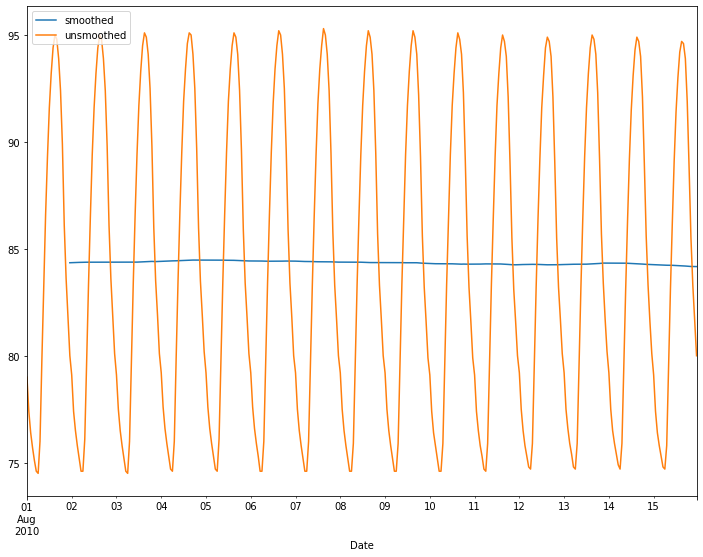

In [152]:
august.plot()
plt.show()

---
### Resampling down to day then getting 7 day moving avg

In [153]:
august = df_weather['Temperature']['2010-August']

# Resample to daily data, aggregating by max
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()

In [154]:
daily_highs.tail()

Date
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [155]:
daily_highs_smoothed.tail()

Date
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

---
### Filter with **`.contains`** 

In [156]:
df_departures.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103,N8607M,MDW,06:30,06:52,165,147,22,07:01,9,0,0,0,0,0,NaN
2015-07-01,WN,144,N8609A,SAN,20:55,20:50,170,158,-5,21:03,13,0,0,0,0,0,NaN
2015-07-01,WN,178,N646SW,ELP,20:30,20:45,90,80,15,20:55,10,0,0,0,0,0,NaN
2015-07-01,WN,232,N204WN,ATL,05:45,05:49,135,137,4,06:01,12,0,0,0,0,0,NaN
2015-07-01,WN,238,N233LV,DAL,12:30,12:34,55,48,4,12:41,7,0,0,0,0,0,NaN


In [157]:
# Extract data for which the destination airport is Dallas: 
dallas = df_departures['Destination Airport'].str.contains('DAL')

dallas.head()

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01     True
Name: Destination Airport, dtype: bool

---
### Resampling - downsample to day then get stats

In [158]:
# Compute the total number of Dallas departures each day: 
daily_departures = dallas.resample('D').sum()

In [159]:
daily_departures.head()

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
Freq: D, Name: Destination Airport, dtype: int64

In [160]:
# Generate the summary statistics for daily Dallas departures: 
stats = daily_departures.describe()

type(stats)

pandas.core.series.Series

In [161]:
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
Name: Destination Airport, dtype: float64

---
### Missing values and interpolation

In [162]:
sample_dates_1

,Seq
Date,
2016-07-01,0
2016-07-02,1
2016-07-03,2
2016-07-04,3
2016-07-05,4
2016-07-06,5
2016-07-07,6
2016-07-08,7
2016-07-09,8


In [163]:
# Missing days 2, 3, 9, 10, 16, 17
sample_dates_2

,Seq
Date,
2016-07-01,0
2016-07-04,1
2016-07-05,2
2016-07-06,3
2016-07-07,4
2016-07-08,5
2016-07-11,6
2016-07-12,7
2016-07-13,8


---


In [164]:
# Reset the index
sample_dates_2_reindex = sample_dates_2.reindex(sample_dates_1.index)

# Notice the NaNs
sample_dates_2_reindex

,Seq
Date,
2016-07-01,0.0
2016-07-02,NaN
2016-07-03,NaN
2016-07-04,1.0
2016-07-05,2.0
2016-07-06,3.0
2016-07-07,4.0
2016-07-08,5.0
2016-07-09,NaN


In [165]:
# Use linear interpolation to fill in the NaNs: 
sample_dates_2_interp = sample_dates_2_reindex.interpolate(how='linear')

sample_dates_2_interp

,Seq
Date,
2016-07-01,0.000000
2016-07-02,0.333333
2016-07-03,0.666667
2016-07-04,1.000000
2016-07-05,2.000000
2016-07-06,3.000000
2016-07-07,4.000000
2016-07-08,5.000000
2016-07-09,5.333333
